
<div class="alert alert-block alert-info">
<b><font size="4"> Importing the Necessary Libraries</font></b>
</div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


<div class="alert alert-block alert-warning">
<b><font size="6">Loading the dataset</font></b>
</div>

In [20]:
# YOUR CODES
df= pd.read_csv(r'C:\Univ\3rd Semester\Programming for Data Science\exam 2\falldetection.csv')

In [21]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [22]:
df.shape

(16382, 7)

In [23]:
df.isnull().sum() # checking for missing values

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

Changing the categorical variable to for falling category alone

In [24]:
df['ACTIVITY'].value_counts()  #3 is falling

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64

In [25]:
df['ACTIVITY'].replace(4,0,inplace=True)
df['ACTIVITY'].replace(2,0,inplace=True)
df['ACTIVITY'].replace(5,0,inplace=True)
df['ACTIVITY'].replace(1,0,inplace=True)

In [26]:
df['ACTIVITY'].value_counts()  #3 is falling

0    12794
3     3588
Name: ACTIVITY, dtype: int64

In [27]:
df['ACTIVITY'].replace(3,1,inplace=True)

In [28]:
df['ACTIVITY'].value_counts()  #1 is falling

0    12794
1     3588
Name: ACTIVITY, dtype: int64

In [29]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,1,4722.92,4019.64,-1600.00,13,79,317
1,0,4059.12,2191.03,-1146.08,20,54,165
2,0,4773.56,2787.99,-1263.38,46,67,224
3,0,8271.27,9545.98,-2848.93,26,138,554
4,0,7102.16,14148.80,-2381.15,85,120,809


In [31]:
x=df.drop('ACTIVITY',axis=1)
y=df['ACTIVITY']

In [32]:
x.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,79,317
1,4059.12,2191.03,-1146.08,20,54,165
2,4773.56,2787.99,-1263.38,46,67,224
3,8271.27,9545.98,-2848.93,26,138,554
4,7102.16,14148.80,-2381.15,85,120,809


In [33]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: ACTIVITY, dtype: int64

<div class="alert alert-block alert-warning">
<b><font size="6">Metrics selection</font></b>
</div>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,recall_score,roc_auc_score
from sklearn.metrics import roc_curve,precision_score,f1_score,auc

<div class="alert alert-block alert-warning">
<b><font size="6">Data Partitioning and scaling</font></b>
</div>

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.30, random_state=23)
#scale it by using standard scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [40]:
print('training shape: ',x_train.shape , y_train.shape)

training shape:  (11467, 6) (11467,)


In [41]:
print('training shape: ',x_test.shape , y_test.shape)

training shape:  (4915, 6) (4915,)


In [42]:
print('training shape: ',x_train_sc.shape , y_train.shape)

training shape:  (11467, 6) (11467,)


In [43]:
print('training shape: ',x_test_sc.shape , y_test.shape)

training shape:  (4915, 6) (4915,)



<div class="alert alert-block alert-warning">
<b><font size="6"> Modelling</font></b>
</div>



<div class="alert alert-block alert-info">
<b><font size="4"> 1). K Nearest Neighbors</font></b>
</div>


In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':[1,2,3,5,8,10]}
knn=KNeighborsClassifier() 
knngrid=GridSearchCV(estimator=knn,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
knngrid.fit(x_train_sc,y_train)
print('\n KNN Modelling: ')
print("\n\t•Best parameters: {}".format(knngrid.best_params_))
print("\n\t•Best cross-validation score: {:.2f}".format(knngrid.best_score_))
print("\n\t•The Test score: ",knngrid.score(x_test_sc,y_test))
y_pred=knngrid.predict(x_test_sc)
y_prob=knngrid.predict_proba(x_test_sc)[:,1]
print('\n\t•ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Not Falling','Falling'],columns=['Not Falling','Falling']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
results = pd.DataFrame(knngrid.cv_results_)
display(results.head())




 KNN Modelling: 

	•Best parameters: {'n_neighbors': 10}

	•Best cross-validation score: 0.83

	•The Test score:  0.8233977619532045

	•ROC-AUC SCORE 0.8540492335287

The Confusion Matrix is plotted below:


,Not Falling,Falling
Not Falling,3522,301
Falling,567,525



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          0       0.86      0.92      0.89      3823
          1       0.64      0.48      0.55      1092

avg / total       0.81      0.82      0.81      4915

   micro avg	   0.82      0.82      0.82


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023580,0.003211,0.162841,0.010558,1,{'n_neighbors': 1},0.811765,0.784562,0.807239,0.806803,...,0.804657,0.010331,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.021204,0.002040,0.195052,0.013042,2,{'n_neighbors': 2},0.827015,0.805495,0.822939,0.825992,...,0.822011,0.008462,3,0.912015,0.915522,0.915958,0.911380,0.910399,0.913055,0.002256
2,0.023005,0.003406,0.199652,0.009223,3,{'n_neighbors': 3},0.824401,0.794156,0.816398,0.821195,...,0.814337,0.010595,5,0.902093,0.903532,0.903532,0.900371,0.900698,0.902045,0.001345
3,0.032006,0.014117,0.294478,0.048876,5,{'n_neighbors': 5},0.823094,0.801134,0.822503,0.834278,...,0.821662,0.011091,4,0.876908,0.878134,0.876063,0.876717,0.878352,0.877235,0.000872
4,0.038604,0.010546,0.245862,0.061574,8,{'n_neighbors': 8},0.834423,0.820323,0.829045,0.845617,...,0.829772,0.009685,2,0.862625,0.861129,0.863200,0.859385,0.863854,0.862039,0.001604


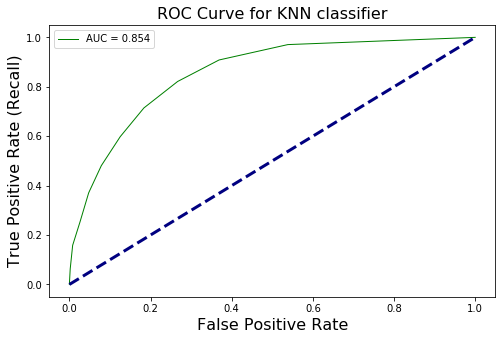

In [46]:
from sklearn.metrics import roc_curve, auc
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8,5))
plt.plot(fpr_knn, tpr_knn, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve for KNN classifier',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
<b><font size="4"> 2) Decision Tree</font></b>
</div>



In [54]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param={'max_depth':[3,5,8,10,12,15,18,20]}
dtree = DecisionTreeClassifier(random_state=999) 
treegrid=GridSearchCV(estimator=dtree,param_grid=param,return_train_score=True,cv=5,n_jobs=-1)
treegrid.fit(x_train,y_train)
print('\n Decision Tree Modelling: ')
print("\n\t•Best parameters: {}".format(treegrid.best_params_))
print("\n\t•Best cross-validation score: {:.2f}".format(treegrid.best_score_))
print("\n\t•The Test score: ",treegrid.score(x_test,y_test))
y_pred=treegrid.predict(x_test)
y_prob=treegrid.predict_proba(x_test)[:,1]
print('\n\t•ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Not Falling','Falling'],columns=['Not Falling','Falling']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
results = pd.DataFrame(treegrid.cv_results_)
display(results.head())




 Decision Tree Modelling: 

	•Best parameters: {'max_depth': 12}

	•Best cross-validation score: 0.82

	•The Test score:  0.824618514750763

	•ROC-AUC SCORE 0.8219599848229198

The Confusion Matrix is plotted below:


,Not Falling,Falling
Not Falling,3459,364
Falling,498,594



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          0       0.87      0.90      0.89      3823
          1       0.62      0.54      0.58      1092

avg / total       0.82      0.82      0.82      4915

   micro avg	   0.82      0.82      0.82


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056188,0.019648,0.002002,0.000630,3,{'max_depth': 3},0.782135,0.782817,0.786306,0.782381,...,0.783204,0.001566,8,0.782381,0.784827,0.783955,0.782320,0.782320,0.783160,0.001042
1,0.119830,0.013967,0.006604,0.005751,5,{'max_depth': 5},0.792157,0.791103,0.799389,0.793284,...,0.793669,0.002943,7,0.797427,0.802921,0.797798,0.801940,0.798452,0.799708,0.002269
2,0.150438,0.022805,0.002201,0.000401,8,{'max_depth': 8},0.818301,0.807676,0.812037,0.812909,...,0.812157,0.003570,6,0.834823,0.843035,0.837366,0.839656,0.836712,0.838319,0.002819
3,0.167842,0.016122,0.003203,0.001470,10,{'max_depth': 10},0.814379,0.825120,0.825120,0.818578,...,0.819656,0.004681,2,0.870148,0.876281,0.872357,0.873011,0.871267,0.872613,0.002077
4,0.136432,0.025599,0.002804,0.001166,12,{'max_depth': 12},0.816993,0.824248,0.825992,0.831225,...,0.823842,0.004811,1,0.908090,0.919555,0.912252,0.914977,0.907020,0.912379,0.004591


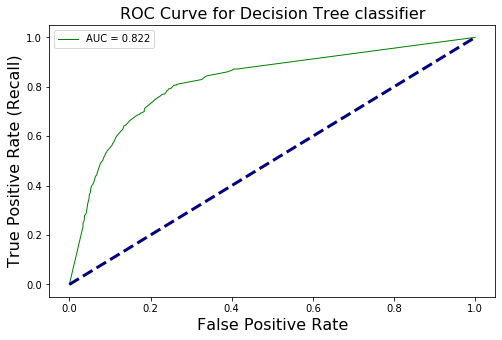

In [55]:
from sklearn.metrics import roc_curve, auc
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_tree, tpr_tree)
plt.figure(figsize=(8,5))
plt.plot(fpr_tree, tpr_tree, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve for Decision Tree classifier',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
<b><font size="4">3) Random Forest</font></b>
</div>



In [57]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param={'max_depth':[3,5,8,10,12,15,18,20],'n_estimators':[100,200,300]}
rftree = RandomForestClassifier(n_jobs=-1,random_state=42,criterion='entropy')
rftreegrid=GridSearchCV(estimator=rftree,param_grid=param,return_train_score=True,cv=3,n_jobs=-1)
rftreegrid.fit(x_train,y_train)
print('\n Decision Tree Modelling: ')
print("\n\t•Best parameters: {}".format(rftreegrid.best_params_))
print("\n\t•Best cross-validation score: {:.2f}".format(rftreegrid.best_score_))
print("\n\t•The Test score: ",rftreegrid.score(x_test,y_test))
y_pred=rftreegrid.predict(x_test)
y_prob=rftreegrid.predict_proba(x_test)[:,1]
print('\n\t•ROC-AUC SCORE',roc_auc_score(y_test,y_prob))
print('\nThe Confusion Matrix is plotted below:')
display(pd.DataFrame(confusion_matrix(y_test,y_pred,labels=[0,1]),index=['Not Falling','Falling'],columns=['Not Falling','Falling']))
print('\nThe Classification Report is plotted below: \n\n',classification_report(y_test,y_pred))
print('   micro avg\t  ',precision_score(y_test, y_pred, average='micro').round(2),'    ',recall_score(y_test, y_pred, average='micro').round(2),'    ',
      f1_score(y_test, y_pred, average='micro').round(2) )
results = pd.DataFrame(rftreegrid.cv_results_)
display(results.head())




 Decision Tree Modelling: 

	•Best parameters: {'max_depth': 20, 'n_estimators': 300}

	•Best cross-validation score: 0.86

	•The Test score:  0.8587995930824008

	•ROC-AUC SCORE 0.9178110558897898

The Confusion Matrix is plotted below:


,Not Falling,Falling
Not Falling,3566,257
Falling,437,655



The Classification Report is plotted below: 

              precision    recall  f1-score   support

          0       0.89      0.93      0.91      3823
          1       0.72      0.60      0.65      1092

avg / total       0.85      0.86      0.85      4915

   micro avg	   0.86      0.86      0.86


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.713890,0.093246,0.105652,0.000444,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.782370,0.782313,0.782313,0.782332,0.000027,22,0.782313,0.782341,0.782341,0.782332,0.000013
1,1.935159,0.352683,0.596484,0.239645,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.782370,0.782313,0.782313,0.782332,0.000027,22,0.782313,0.782341,0.782341,0.782332,0.000013
2,2.816378,0.189113,0.403772,0.117837,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.782370,0.782313,0.782313,0.782332,0.000027,22,0.782313,0.782341,0.782341,0.782332,0.000013
3,1.374345,0.508651,0.139371,0.029687,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.783678,0.785453,0.787023,0.785384,0.001366,19,0.785453,0.786789,0.788358,0.786867,0.001188
4,2.510966,0.395756,0.681176,0.175528,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.782370,0.785191,0.787023,0.784861,0.001914,21,0.784275,0.786789,0.788358,0.786474,0.001682


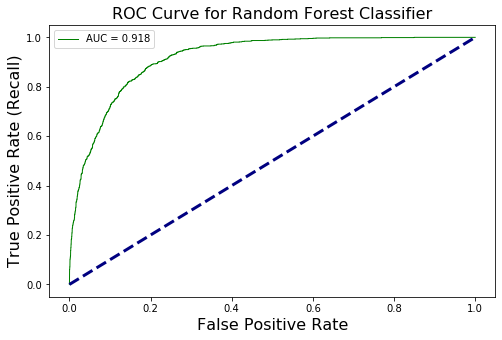

In [58]:
from sklearn.metrics import roc_curve, auc
fpr_rftree, tpr_rftree, thresholds_rftree = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_rftree, tpr_rftree)
plt.figure(figsize=(8,5))
plt.plot(fpr_rftree, tpr_rftree, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve for Random Forest Classifier',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


<div class="alert alert-block alert-info">
<b><font size="4">Scores Comparison by ROC Curves</font></b>
</div>



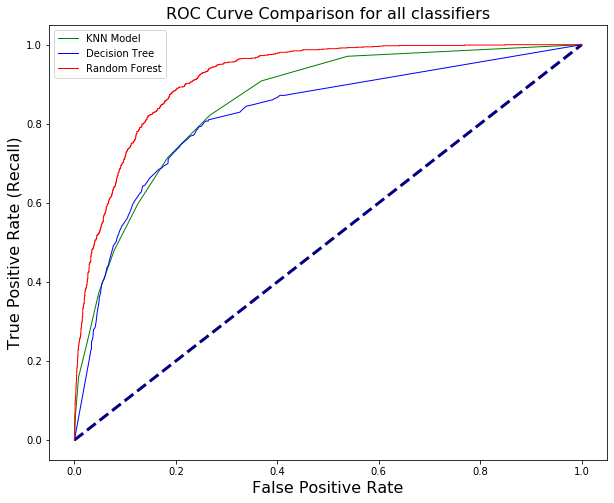

In [61]:
plt.figure(figsize=(10,8))
plt.plot(fpr_knn, tpr_knn, lw=1, color='green', label='KNN Model')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.plot(fpr_tree, tpr_tree, lw=1, color='blue', label='Decision Tree')
plt.plot(fpr_rftree, tpr_rftree, lw=1, color='red', label=f'Random Forest')
plt.title('ROC Curve Comparison for all classifiers',fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


<div class="alert alert-block alert-success">

From the above plot we can see that the Random Forest classifier has the best ROC score of 0.91 and classify the Falling category data very well when compared with the other two models